## 1. Aplicaciones y rese√±as de Google Play Store

<p><b>Aclaraci√≥n:</b> El contenido de esta <em>notebook</em> es de autor√≠a y ha sido dise√±ado por <a href="https://www.linkedin.com/in/lgupta18/">Lavanya Gupta</a> - Ingeniera de Software de profesi√≥n con intereses de investigaci√≥n en ciencia de datos, aprendizaje autom√°tico y aprendizaje profundo. Ella tiene una rica experiencia en los principales proyectos de producci√≥n basados ‚Äã‚Äãen datos en la industria. Ella es una programadora apasionada en Python, ¬°y le encanta experimentar con nuevos conjuntos de datos que ella misma crea!</p>

<p> Las aplicaciones m√≥viles est√°n en todas partes. Son f√°ciles de crear y pueden ser lucrativas. Debido a estos dos factores, se est√°n desarrollando m√°s y m√°s aplicaciones. En este cuaderno, haremos un an√°lisis exhaustivo del mercado de aplicaciones de Android comparando m√°s de diez mil aplicaciones en Google Play en diferentes categor√≠as. Buscaremos informaci√≥n en los datos para dise√±ar estrategias para impulsar el crecimiento y la retenci√≥n. </p>

<ul>
<li> <code> APPS.csv </code>: contiene todos los detalles de las aplicaciones en Google Play. Hay 13 caracter√≠sticas que describen una aplicaci√≥n determinada. </li>
<li> <code> RESENAS_USUARIOS.csv </code>: contiene 100 rese√±as para cada aplicaci√≥n, <a href = "https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/"> m√°s √∫til primero </a>. El texto de cada revisi√≥n ha sido preprocesado y se le atribuyen tres caracter√≠sticas nuevas: Sentimiento (Positivo, Negativo o Neutral), Polaridad del sentimiento y Subjetividad del sentimiento. </li>
</ul>

In [1]:
# leer los datasets
import pandas as pd
apps_con_duplicados = pd.read_csv('DATASETS/APPS.csv')
print('\n')

# Eliminar duplicados
apps = apps_con_duplicados.drop_duplicates()
print(apps.head())
print('\n')

# Imprimir el n√∫mero total de apps
napps = apps['App'].nunique()
print('El n√∫mero total de apps en el dataset = ', napps)
print('\n')

# Imprimir un resumen conciso del dataframe apps
print(apps.info())



   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & Design;Pretend Pla

In [2]:
# Mostrar una muestra aleatoria de n filas
n = 5
apps.sample(n)

Unnamed: 0                                                App  \
2617        3346                                   ZERO Lock Screen   
2812        3568                          Unclouded - Cloud Manager   
1470        1813        Cooking Madness - A Chef's Restaurant Games   
3761        4678              Sin City Crime Simulator V - Gangster   
4682        5663  Learners Test Free: AU Driver Knowledge Test (...   

          Category  Rating  Reviews  Size     Installs  Type Price  \
2617         TOOLS     3.5    75336   0.5   1,000,000+  Free     0   
2812  PRODUCTIVITY     4.1     6850  11.0     100,000+  Free     0   
1470          GAME     4.7   358817  49.0  10,000,000+  Free     0   
3761          GAME     4.2     2113  67.0     100,000+  Free     0   
4682        FAMILY     3.9      623   8.5     100,000+  Free     0   

     Content Rating        Genres      Last Updated         Current Ver  \
2617       Everyone         Tools  February 5, 2016                 1.3   
2812       Everyone  Productivity    August 8, 2016          2.3.3-play   
1470       Everyone        Arcade     July 30, 2018               1.2.2   
3761   Everyone 10+        Action    April 23, 2018  Varies with device   
4682       Everyone     Education    March 26, 2018                 3.5   

       Android Ver  
2617    4.0 and up  
2812    4.1 and up  
1470    4.1 and up  
3761  4.0.3 and up  
4682    4.1 and up

## 2. Limpieza de datos

<p> Las cuatro caracter√≠sticas con las que trabajaremos con mayor frecuencia en adelante son <code>Installs</code> (Instalaciones), <code>Size</code> (Tama√±o), <code>Rating</code> (Puntaje) y <code>Precio</code> (Precio). El m√©todo <code>.info()</code> (de la tarea anterior) nos dijo que las columnas <code>Installs</code> y <code>Price</code> son de tipo <code>object</code> y no <code>int64</code> (entero) o <code>float64</code> (decimal) como cabr√≠a esperar. Esto se debe a que la columna contiene algunos caracteres m√°s que solo d√≠gitos [0,9].</p>
<p>Idealmente, nos gustar√≠a que estas columnas sean num√©ricas como su nombre lo sugiere.</p><br>
<p>Por lo tanto, ahora procedemos a la limpieza y preparamos nuestros datos para ser consumidos en nuestros an√°lisis m√°s adelante. Espec√≠ficamente, la presencia de caracteres especiales (<code>, $ +</code>) en las columnas <code>Installs</code> y <code>Price</code> dificulta su conversi√≥n a un tipo de datos num√©rico.


In [3]:
# Lista de caracteres a remover
car_a_remover = ["+",",","$"]

# Lista de nombres de columnas a limpiar
col_a_limpiar = ["Installs", "Price"]

# Bucle por cada col√∫mna
for col in col_a_limpiar:
    # Reemplazar cada caracter con una cadena vac√≠a
    for car in car_a_remover:
        apps[col] = apps[col].astype(str).str.replace(car,'')
    # Convertir la columna a num√©rica
    apps[col] = pd.to_numeric(apps[col])

In [4]:
display(apps.sample(5))

Unnamed: 0                                                App  \
2983        3742  Breaking News, Local news, Attacks and Alerts ...   
4407        5363                                      I Am Innocent   
2123        2696  Wemep - Special price representative (special ...   
4532        5496                                     Undead Assault   
5786        6817                                BU Dental GoGoldman   

                Category  Rating  Reviews  Size  Installs  Type  Price  \
2983  NEWS_AND_MAGAZINES     4.7     2543   6.3    500000  Free    0.0   
4407                GAME     4.4   208501  56.0   1000000  Free    0.0   
2123            SHOPPING     4.5   178497   9.1  10000000  Free    0.0   
4532                GAME     4.3     4704  37.0    100000  Free    0.0   
5786    TRAVEL_AND_LOCAL     NaN        0  18.0       100  Free    0.0   

     Content Rating            Genres       Last Updated Current Ver  \
2983       Everyone  News & Magazines      July 19, 2018       8.0.6   
4407           Teen         Adventure      July 23, 2018     2.8.307   
2123       Everyone          Shopping     August 2, 2018      4.33.0   
4532   Everyone 10+            Arcade   November 4, 2015       1.4.6   
5786       Everyone    Travel & Local  September 1, 2017         1.2   

       Android Ver  
2983    4.1 and up  
4407  4.0.3 and up  
2123  4.0.3 and up  
4532    2.3 and up  
5786    4.4 and up

## 3. Explorar categor√≠as de app

<p> Con m√°s de mil millones de usuarios activos en 190 pa√≠ses de todo el mundo, Google Play sigue siendo una importante plataforma de distribuci√≥n para generar audiencia global. Para que las empresas tengan sus aplicaciones frente a los usuarios, es importante hacer que sean m√°s r√°pidas y f√°ciles de descubrir en Google Play. Para mejorar la experiencia general de b√∫squeda, Google ha introducido el concepto de agrupar aplicaciones en categor√≠as. </p>
<p> Esto nos trae a la siguientes preguntas:</p>
<ul>
    <li>¬øQu√© categor√≠a tiene la mayor proporci√≥n de aplicaciones (activas) en el mercado?</li>
    <li>¬øExiste alguna categor√≠a espec√≠fica dominando en el mercado?</li>
    <li>¬øQu√© categor√≠as tienen el menor n√∫mero de aplicaciones</li>
</ul>
<p>Veremos que hay <code>33</code> categor√≠as √∫nicas de aplicaciones presentes en nuestro conjunto de datos. Las aplicaciones de <code>Family</code> (Familia) y <code>Game</code> (Juegos) tienen la prevalencia m√°s alta del mercado. Interesantemente, las categor√≠as de <code>Tools</code> (Herramientas), <code>Business</code> (Negocios) y <code>Medical</code> (M√©dicas) est√°n tambi√©n en la cima.

In [14]:
# Importar plotly
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Imprimir el n√∫mero total de categor√≠as √∫nicas
num_categorias = len(apps['Category'].unique())
print('N√∫mero de categor√≠as =', num_categorias)

# Contar el n√∫mero de aplicaciones en cada categor√≠a y ordenarlas en orden descendente
num_apps_en_categoria = apps['Category'].value_counts().sort_values(ascending=False)

datos = [go.Bar(
         x = num_apps_en_categoria.index, # index = nombre de categor√≠a
         y = num_apps_en_categoria.values # value = count
    
)]

plotly.offline.iplot(datos)

N√∫mero de categor√≠as = 33


## 4. Distribuci√≥n del puntaje de las apps

<p>Despu√©s de haber presenciado la cuota de mercado para cada categor√≠a de aplicaciones, veamos c√≥mo funcionan todas estas aplicaciones en promedio. Las clasificaciones de aplicaciones (en una escala de 1 a 5) afectan la capacidad de detecci√≥n, la conversi√≥n de aplicaciones y la imagen general de la marca de la compa√±√≠a. Las clasificaciones son un indicador clave de rendimiento de una aplicaci√≥n.</p>

In [16]:
# Calificaciones promedio de las apps
calif_promedio_app = apps['Rating'].mean()
print('Calificaci√≥n promedio de las app = ', calif_promedio_app)

# Distribuci√≥n de las apps de acuerdo a su calificaci√≥n
datos = [go.Histogram(
         x = apps['Rating']
)]

# L√≠nea discontinua vertical para indicar el promedio
diseno = {'shapes': [{
            'type':'line',
            'x0': calif_promedio_app,
            'y0': 0,
            'x1': calif_promedio_app,
            'y1': 1000,
            'line': {'dash': 'dashdot'}
         }]
         }

plotly.offline.iplot({'data':datos, 'layout': diseno})

Calificaci√≥n promedio de las app =  4.173243045387998


<p>De nuestra investigaci√≥n, encontramos que el volumen promedio de calificaciones en todas las categor√≠as de aplicaciones es <code>4.17</code>. El diagrama del histograma est√° sesgado a la izquierda, lo que indica que la mayor√≠a de las aplicaciones est√°n altamente calificadas, con solo unas pocas excepciones en las aplicaciones de baja calificaci√≥n.</p>

## 5. Tama√±o y precio de una app

<p>Ahora examinemos el tama√±o y el precio de la aplicaci√≥n. Para el tama√±o, si la aplicaci√≥n m√≥vil es demasiado grande, puede ser dif√≠cil y/o costoso para los usuarios descargarla. Los largos tiempos de descarga pueden apagar a los usuarios incluso antes de que experimenten su aplicaci√≥n m√≥vil. Adem√°s, el dispositivo de cada usuario tiene una cantidad finita de espacio en disco. Por el precio, algunos usuarios esperan que sus aplicaciones sean gratuitas o de bajo costo. Estos problemas se agravan si el mundo en desarrollo es parte de su mercado objetivo; especialmente debido a las velocidades de internet, el poder adquisitivo y las tasas de cambio.</p>

<p>¬øC√≥mo podemos idear estrategias para dimensionar y poner precio a nuestra aplicaci√≥n?</p>
<ul>
    <li>¬øEl tama√±o de una aplicaci√≥n afecta su calificaci√≥n? </li>
    <li>¬øLos usuarios realmente se preocupan por las aplicaciones pesadas del sistema o prefieren las aplicaciones livianas?</li>
    <li>¬øEl precio de una aplicaci√≥n afecta su calificaci√≥n?</li>
    <li>¬øLos usuarios siempre prefieren aplicaciones gratuitas a aplicaciones pagas?</li>
</ul>

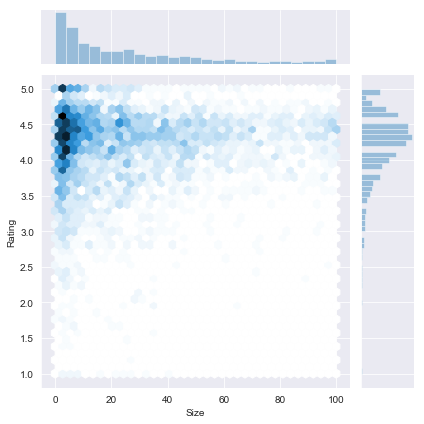

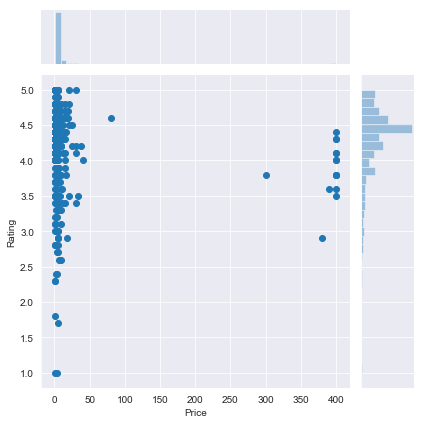

In [19]:
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

# Filtrar las filas donde los valores Rating (Calificaci√≥n) y Size (Tama√±o) no sean nulos
apps_con_tam_y_calif_presente = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]

# Subdivide para categor√≠as con al menos 250 apps
categorias_grandes = apps_con_tam_y_calif_presente.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

# Grafica tama√±o vs. calificaci√≥n
plt1 = sns.jointplot(x=categorias_grandes['Size'], y=categorias_grandes['Rating'], kind='hex')

# Subdivide las apps cuyo 'Type' (tipo) es 'Paid' (Pago)
apps_pagas = apps_con_tam_y_calif_presente[apps_con_tam_y_calif_presente['Type'] == 'Paid']

# Grafica precio vs. calificaci√≥n
plt1 = sns.jointplot(x=apps_pagas['Price'], y=apps_pagas['Rating'])

<p>Encontramos que la mayor√≠a de las aplicaciones mejor calificadas (calificaci√≥n mayor a 4) var√≠an de 2 MB a 20 MB. Tambi√©n encontramos que la gran mayor√≠a de las aplicaciones cuestan menos de $ 10.</p>

## 6. Relaci√≥n entre la categor√≠a y el precio de la app

<p>Entonces ahora viene la parte dif√≠cil. ¬øC√≥mo se supone que las empresas y los desarrolladores deben llegar a fin de mes? ¬øQu√© estrategias de monetizaci√≥n pueden usar las empresas para maximizar las ganancias? Los costos de las aplicaciones se basan principalmente en las caracter√≠sticas, la complejidad y la plataforma.</p>

<p>Hay muchos factores a considerar al seleccionar la estrategia de precios adecuada para su aplicaci√≥n m√≥vil. Es importante tener en cuenta la disposici√≥n de su cliente a pagar por su aplicaci√≥n. Un precio incorrecto podr√≠a romper el trato incluso antes de que ocurra la descarga. Los clientes potenciales podr√≠an verse afectados por lo que perciben como un costo sorprendente, o podr√≠an eliminar una aplicaci√≥n que han descargado despu√©s de recibir demasiados anuncios o simplemente no obtener el valor de su dinero.</p>

<p>Las diferentes categor√≠as exigen diferentes rangos de precios. Algunas aplicaciones que son simples y se usan a diario, como la aplicaci√≥n de calculadora, probablemente deber√≠an mantenerse libres. Sin embargo, tendr√≠a sentido cobrar por una aplicaci√≥n m√©dica altamente especializada que diagnostica a pacientes diab√©ticos. A continuaci√≥n, vemos que las aplicaciones <code>Medical</code> (M√©dicas) y <code>Family</code> (Familiares) son las m√°s caras. ¬°Algunas aplicaciones m√©dicas se extienden incluso hasta \$ 80! Todas las aplicaciones de juegos tienen un precio razonable por debajo de \$ 20. </p>

Text(0.5, 1.0, 'Tendencia de precios de aplicaciones a trav√©s de categor√≠as')

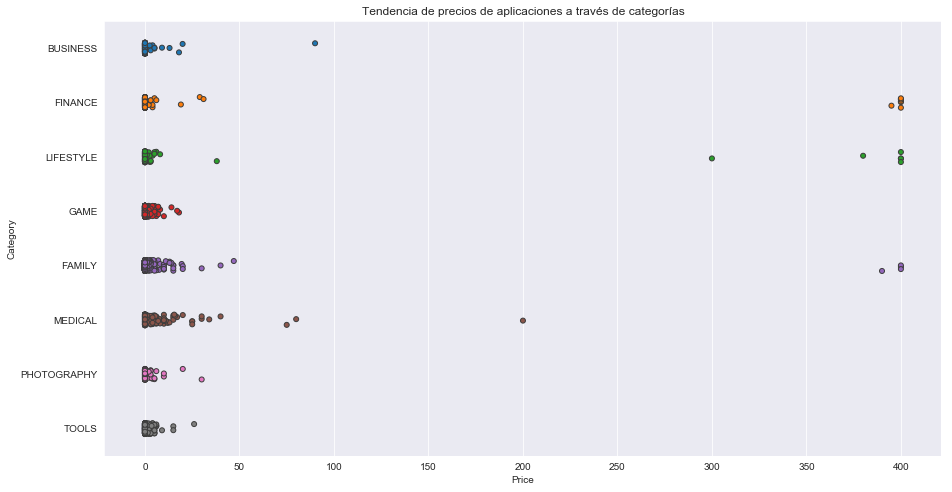

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Seleccionar algunas categor√≠as populares de apps
pop_cats = ['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS','FINANCE', 'LIFESTYLE', 'BUSINESS']
cat_pop_apps = apps[apps['Category'].isin(pop_cats)]

# Examinar la tendencia de precios al graficar Precio vs Categor√≠a
ax = sns.stripplot(x = cat_pop_apps['Price'], y = cat_pop_apps['Category'], jitter = True, linewidth = 1)
ax.set_title('Tendencia de precios de aplicaciones a trav√©s de categor√≠as')

In [29]:
# Aplicaciones cuyo precio es mayor a 200
apps_sobre_200 = cat_pop_apps[['Category','App','Price']][cat_pop_apps['Price']>200]
apps_sobre_200

Category                                App   Price
3327     FAMILY             most expensive app (H)  399.99
3465  LIFESTYLE                         üíé I'm rich  399.99
3469  LIFESTYLE           I'm Rich - Trump Edition  400.00
4396  LIFESTYLE                          I am rich  399.99
4398     FAMILY                     I am Rich Plus  399.99
4399  LIFESTYLE                      I am rich VIP  299.99
4400    FINANCE                  I Am Rich Premium  399.99
4401  LIFESTYLE                I am extremely Rich  379.99
4402    FINANCE                         I am Rich!  399.99
4403    FINANCE                 I am rich(premium)  399.99
4406     FAMILY                      I Am Rich Pro  399.99
4408    FINANCE     I am rich (Most expensive app)  399.99
4410     FAMILY                          I Am Rich  389.99
4413    FINANCE                          I am Rich  399.99
4417    FINANCE                 I AM RICH PRO PLUS  399.99
8763    FINANCE                        Eu Sou Rico  394.99
8780  LIFESTYLE  I'm Rich/Eu sou Rico/ÿ£ŸÜÿß ÿ∫ŸÜŸä/ÊàëÂæàÊúâÈå¢  399.99

## 7. Dejar por fuera las 'Apps Chatarra'

<p> Parece que muchas de las aplicaciones realmente caras son aplicaciones "basura". Es decir, aplicaciones que realmente no tienen un prop√≥sito. Algunos desarrolladores de aplicaciones pueden crear una aplicaci√≥n llamada <code>I Am Rich Premium</code> o <code>most expensive app (H)</code> solo por una broma o para probar sus habilidades de desarrollo de aplicaciones. Algunos desarrolladores incluso hacen esto con intenciones maliciosas e intentan ganar dinero esperando que la gente haga clic accidentalmente en comprar en su aplicaci√≥n en la tienda.</p>
<p>Dejemos por fuera estas aplicaciones basura y volvamos a hacer nuestra visualizaci√≥n.</p>

Text(0.5, 1.0, 'Tendencia de precios de las aplicaciones a trav√©s de las categor√≠as dejando por fuera las "Apps Chatarra"')

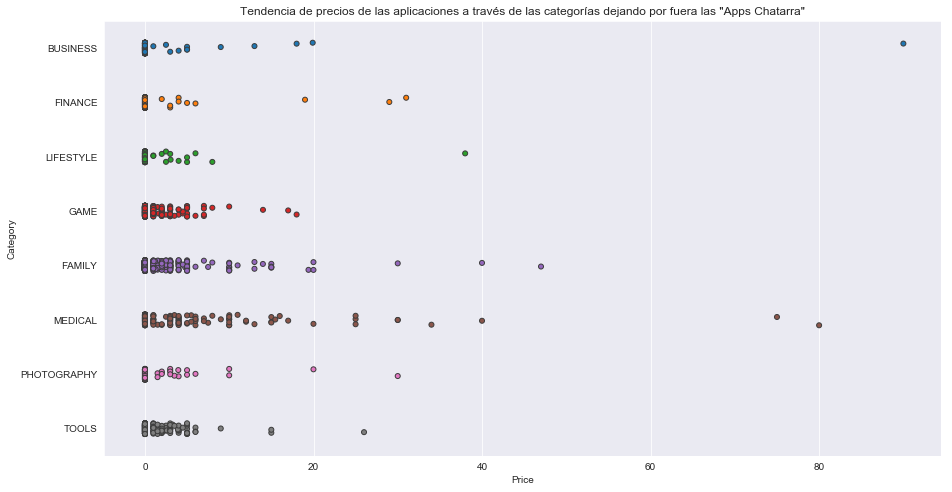

In [34]:
# Seleccionar las apps con precio menor a 100
apps_bajo_100 = cat_pop_apps[cat_pop_apps['Price']<100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examinar precio vs. categor√≠a con las apps m√°s aut√©nticas (apps_bajo_100)
ax = sns.stripplot(x = apps_bajo_100['Price'], y = apps_bajo_100['Category'], jitter = True, linewidth = 1)
ax.set_title('Tendencia de precios de las aplicaciones a trav√©s de las categor√≠as dejando por fuera las "Apps Chatarra"')

## 8. Popularidad de las apps pagas vs. apps gratis

<p> Para las aplicaciones en Play Store hoy en d√≠a, existen cinco tipos de estrategias de precios: <em>free, freemium, paid, paymium y suscription</em>. Centr√©monos solo en aplicaciones <em>free</em> (gratuitas) y <em>paid</em> (pagas). Algunas caracter√≠sticas de las aplicaciones gratuitas son:</p>
<ul>
    <li>Son gratis para descargar.</li>
    <li>La principal fuente de ingresos a menudo proviene de los anuncios.</li>
    <li>A menudo creada por compa√±√≠as que tienen otros productos y la aplicaci√≥n sirve como una extensi√≥n de esos productos.</li>
    <li>Puede servir como una herramienta para la retenci√≥n de clientes, la comunicaci√≥n y el servicio al cliente. </li>
</ul>
<p>Algunas caracter√≠sticas de las aplicaciones pagas son:</p>
<ul>
    <li>Se pide a los usuarios que paguen una vez por la aplicaci√≥n para descargarla y usarla.</li>
    <li>El usuario realmente no puede tener una idea de la aplicaci√≥n antes de comprarla.</li>
</ul>
<p>¬øLas aplicaciones pagas se instalan tanto como las aplicaciones gratuitas? Resulta que las aplicaciones pagas tienen un n√∫mero relativamente menor de instalaciones que las aplicaciones gratuitas, ¬°aunque la diferencia no es tan marcada como hubiera esperado!</p>

In [37]:
trazo0 = go.Box(
    # Datos de aplicaciones pagas
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paga'
)

trazo1 = go.Box(
    # Datos de aplicaciones gratuitas
    y = apps[apps['Type'] =='Free']['Installs'],
    name = 'Gratuita'
)

diseno = go.Layout(
    title = 'N√∫mero de descargas de apps pagas vs. apps gratuitas',
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# A√±adir trazo0 y trazo1 a una lista para graficar
datos = [trazo0, trazo1]
plotly.offline.iplot({'data': datos, 'layout': diseno})

## 9. An√°lisis de sentimientos de las rese√±as de los usuarios

<p>Minar los datos de rese√±as de usuarios para determinar c√≥mo se sienten las personas acerca de su producto, marca o servicio se pueden hacer utilizando una t√©cnica llamada an√°lisis de sentimientos. Las revisiones de los usuarios para las aplicaciones se pueden analizar para identificar si el estado de √°nimo es positivo, negativo o neutral sobre esa aplicaci√≥n. Por ejemplo, las palabras positivas en una revisi√≥n de la aplicaci√≥n pueden incluir palabras como 'incre√≠ble', 'amigable', 'bueno', 'genial' y 'amor'. Las palabras negativas pueden ser palabras como 'malware', 'odio', 'problema', 'reembolso' e 'incompetente'.</p>

In [40]:
# Cargar las rese√±as de los usuarios
resenas_df = pd.read_csv('DATASETS/RESENAS_USUARIOS.csv')

# Mostrar las primeras filas del conjunto de datos
display(resenas_df.head())

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000

In [41]:
# Unir dos dataframes
df_unido = pd.merge(apps, resenas_df, on='App', how='inner')

# Mostrar las primeras filas de los dataframes unidos
display(df_unido.head())

Unnamed: 0                  App        Category  Rating  Reviews  Size  \
0           1  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0   
1           1  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0   
2           1  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0   
3           1  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0   
4           1  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0   

   Installs  Type  Price Content Rating                     Genres  \
0    500000  Free    0.0       Everyone  Art & Design;Pretend Play   
1    500000  Free    0.0       Everyone  Art & Design;Pretend Play   
2    500000  Free    0.0       Everyone  Art & Design;Pretend Play   
3    500000  Free    0.0       Everyone  Art & Design;Pretend Play   
4    500000  Free    0.0       Everyone  Art & Design;Pretend Play   

       Last Updated Current Ver   Android Ver  \
0  January 15, 2018       2.0.0  4.0.3 and up   
1  January 15, 2018       2.0.0  4.0.3 and up   
2  January 15, 2018       2.0.0  4.0.3 and up   
3  January 15, 2018       2.0.0  4.0.3 and up   
4  January 15, 2018       2.0.0  4.0.3 and up   

                                   Translated_Review Sentiment  \
0  A kid's excessive ads. The types ads allowed a...  Negative   
1                                         It bad >:(  Negative   
2                                               like   Neutral   
3                                                NaN       NaN   
4                           I love colors inspyering  Positive   

   Sentiment_Polarity  Sentiment_Subjectivity  
0              -0.250                1.000000  
1              -0.725                0.833333  
2               0.000                0.000000  
3                 NaN                     NaN  
4               0.500                0.600000

In [42]:
# Eliminar o soltar valores nulos para las columnas Sentiment (Sentimientos) y Translated_Review (Rese√±a traducida)
df_unido = df_unido.dropna(subset=['Sentiment', 'Translated_Review'])
display(df_unido.head())

Unnamed: 0                  App        Category  Rating  Reviews  Size  \
0           1  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0   
1           1  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0   
2           1  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0   
4           1  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0   
5           1  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0   

   Installs  Type  Price Content Rating                     Genres  \
0    500000  Free    0.0       Everyone  Art & Design;Pretend Play   
1    500000  Free    0.0       Everyone  Art & Design;Pretend Play   
2    500000  Free    0.0       Everyone  Art & Design;Pretend Play   
4    500000  Free    0.0       Everyone  Art & Design;Pretend Play   
5    500000  Free    0.0       Everyone  Art & Design;Pretend Play   

       Last Updated Current Ver   Android Ver  \
0  January 15, 2018       2.0.0  4.0.3 and up   
1  January 15, 2018       2.0.0  4.0.3 and up   
2  January 15, 2018       2.0.0  4.0.3 and up   
4  January 15, 2018       2.0.0  4.0.3 and up   
5  January 15, 2018       2.0.0  4.0.3 and up   

                                   Translated_Review Sentiment  \
0  A kid's excessive ads. The types ads allowed a...  Negative   
1                                         It bad >:(  Negative   
2                                               like   Neutral   
4                           I love colors inspyering  Positive   
5                                             I hate  Negative   

   Sentiment_Polarity  Sentiment_Subjectivity  
0              -0.250                1.000000  
1              -0.725                0.833333  
2               0.000                0.000000  
4               0.500                0.600000  
5              -0.800                0.900000

Text(0.5, 1.0, 'Distribuci√≥n de la Polaridad del Sentimiento')

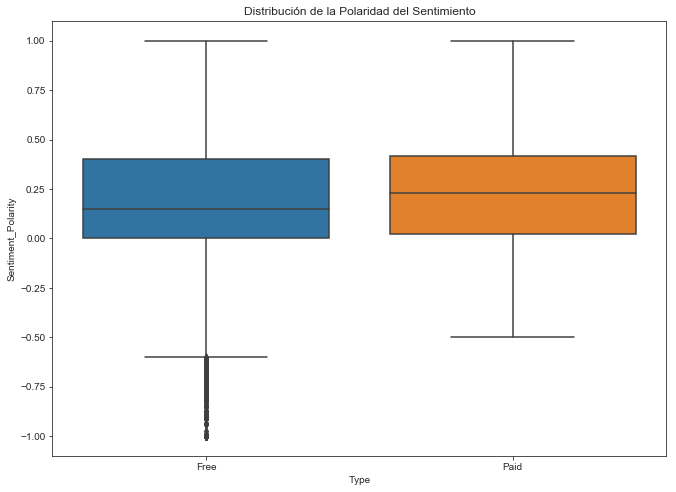

In [47]:
# Utilizar el modulo de seaborn
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11,8)

# Polaridad de sentimiento de los usuario para apps pagas vs. apps gratis
ax = sns.boxplot(x = df_unido['Type'], y = df_unido['Sentiment_Polarity'], data = df_unido)
ax.set_title('Distribuci√≥n de la Polaridad del Sentimiento')

<p>Al graficar los puntajes de polaridad de las opiniones de los usuarios para las aplicaciones gratuitas y de pago, observamos que las aplicaciones gratuitas reciben muchos comentarios duros, como lo indican los valores at√≠picos en el eje y negativo. Las rese√±as de aplicaciones pagas nunca parecen ser extremadamente negativas. Esto puede indicar algo sobre la calidad de la aplicaci√≥n, es decir, las aplicaciones pagas son de mayor calidad que las aplicaciones gratuitas en promedio. El puntaje medio de polaridad para las aplicaciones pagas es un poco m√°s alto que las aplicaciones gratuitas, por lo que se sincroniza con nuestra observaci√≥n anterior.</p>
<p>En este <em>notebook</em>, analizamos m√°s de diez mil aplicaciones de Google Play Store. Podemos usar nuestros hallazgos para informar nuestras decisiones si alguna vez deseamos crear una aplicaci√≥n nosotros mismos. </p>